<a href="https://colab.research.google.com/github/BR-Lab/ML-algorithm/blob/main/Linear_regression_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 실습

## 0.Introduction

분석 모델
$$\qquad\qquad\qquad\qquad대중교통수\qquad\qquad쇼핑시설 수$$
$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... + \beta_pX_p$$
$$부동산 가격\qquad인근 학교 수\qquad\quad쇼핑시설 수\qquad\qquad\qquad$$  
<br>
 

*   각 변수에 따른 $\beta$ 값들을 예측하고 p-value로 각 변수들이 유효한지에 대한 통계 검증.
*   새로운 input값을 통한 predicted value 도출.

<br><br>
분석 패키지
*   확률오차 확인과 예측 값의 오류에 대해서는 statModels 사용
> 보통 sklearn(data 분석능력이 보다 우수)을 사용하지만 statModels의 경우 검정통계 등 검증된 통계 및 계량 도구를 제공.<br>
다양한 선형 회귀 모델, 혼합 선형 모델, 회귀 분석이 필요한 경우 불연속 종속 변수에 대한 옵션이 더 풍부하기 때문에 linear regression에서는 statModels 사용해 분석

<br><br>
[정규성, 등분산성 등의 필요성 정리된 github](https://https://yoongaemii.github.io/working_posts/2020-05-15/)


## 1.import module

In [ ]:
#!pip install sklearn

#Boston Housing Price 데이터 패키지
from sklearn.datasets import load_boston

#데이터 전처리 패키지
import numpy as np
import pandas as pd

#ML model 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fgm

#한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.데이터 불러오기

###2.1 data description

1. 데이터 구조


*   데이터 : 1978년 보스턴 주택 가격
*   관측치 개수: 506개
*   변수 개수: 14개(설명번수:13개, 반응변수:1개)

2. 설명변수  


|변수 명|설명|
|:--------|-----------|
| CRIM |자치시(town) 별 1인당 범죄율  |
|ZN| 25,000 평방피트를 초과하는 거주지역의 비율|
|  INDUS| 비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS| 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)|
|  NOX| 10ppm 당 농축 일산화질소|
| RM| 주택 1가구당 평균 방의 개수|
|  AGE| 1940년 이전에 건축된 소유주택의 비율|
|  DIS| 5개의 보스턴 직업센터까지의 접근성 지수|
|RAD| 방사형 도로까지의 접근성 지수|
|TAX| 10,000 달러 당 재산세율|  
|PTRATIO| 자치시(town)별 학생/교사 비율|
|B| 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.| 
|LSTAT| 모집단의 하위계층의 비율(%)|

3. 반응변수(결과값)

|변수 명|설명|
|:--------|-----------|
|  MEDV| 본인 소유의 주택가격(중앙값) (단위: $1,000)|


In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston.data.shape

(506, 13)

## 3.데이터 전처리

In [ ]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = pd.DataFrame(boston.target, columns  = ['MEDV'])

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 3.2 train, test set 나누기


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2021)

## 4. Linear Regression model 구축

statsmodel의 OLS(Ordinary Least Squares) 사용하여 linear regression 분석 시행


*   OLS: 가장 기본적은 결정론적 linear regression 방법으로 RSS(Residual Sum of Squres)를 최소화 하는 가중치($\beta_1, \beta_2, ...$) 구하는 방법
*   모델 선언: model = sm.OLS(Y, X), 모델학습 : model_trained = model.fit()



In [ ]:
X_train = sm.add_constant(X_train) #B_0에 대한 constant를 임의의 수인 1로 추가해주는 과정
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

### 4.1확률오차의 정규성 확인
확률오차 가정 : $$\epsilon_i \sim 정규분포 E(\epsilon_i) = 0 \quad V(\epsilon_i) = \sigma^2 for\, all\, i.  \\
\epsilon_i \sim N(0,\sigma^2), i=1,2,...,n$$

<br>


*   확률오차의 정규성 확인
*   확률오차의 등분산성 확인




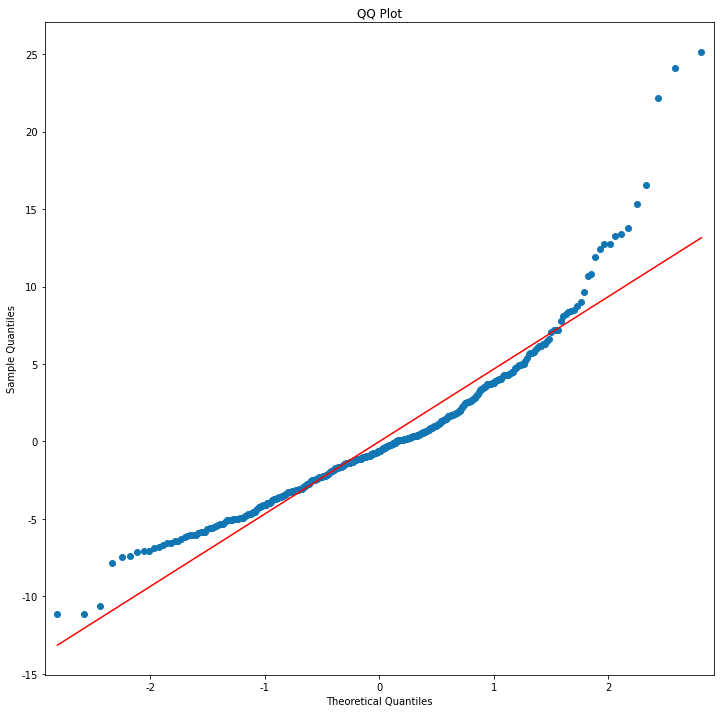

In [ ]:
#확률오차의 정규성 확인
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False #음수 폰트 꺠짐 방지
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s',color='#1177b4', ax = ax)
ax.title.set_text('QQ Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted values')]

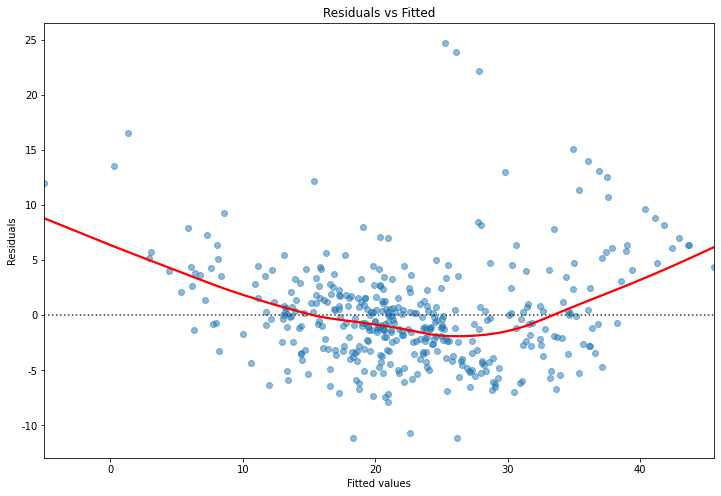

In [ ]:
#확률오차의 등분산성 확인
model_fitted_y = model_trained.fittedvalues

#plt.rcParams['axes.unicode_minus'] = False #음수 폰트 깨짐 방지
fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess = True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax = ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel = 'Fitted values', ylabel='Residuals')



*   정규성 : data가 line을 대체로 잘 따름
*   등분산성: 분산을 표현한 line이 대체로 0에 대해 일직선인 편



###4.2설명: 통계적 해석


*   R-squared (결정계수, coefficient of determinant): 모델의 성능
*   coeff(회귀계수): X가 한단위 증가할 떄 Y의 변화량
*   P>|t| (p-value): 0.05(유의수준) 이하일 떄 변수가 유의미



In [ ]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          1.02e-110
Time:                        11:25:31   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

In [ ]:
#p-value가 높은 변수 제거: INDUS, AGE
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          1.19e-112
Time:                        11:28:51   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

R_squared나 adj.R_sqaured가 좋아지지는 않았지만 0.05이상의 p-value 값을 가지는 column(변수)들은 무의미 하므로 drop!

###4.3예측

### 예측 값에 대한 오차 구하기
*   Mean Squared Error(평균 제곱 오차)
*   Root Mean Squared(제곱근 평균 오차)
*   Mean Absolute Error(평균 절대값 오차)
*   Mean Absolute Percentage Error(평균 절대 백분율 오차)
*   R-squred(결정계수)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

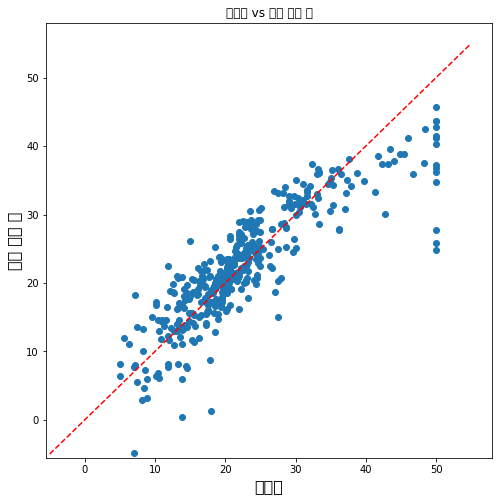

In [ ]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (8,8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5,55],[-5,55],ls='--',c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5.55)
plt.ylim(-5.55)
plt.show()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS', 'AGE'], axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

In [ ]:
#Mean Squared Error(평균 제곱 오차)
print(mean_squared_error(y_test, y_test_pred))

23.06315824035388


In [ ]:
#Root Mean Squared Error(제곱근 평균 제곱 오차)
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.802411710833827


In [ ]:
#Mean Absolute Error(평균 절대 오차)
print(mean_absolute_error(y_test,y_test_pred))

3.5123023508951228


In [ ]:
#Mean Abolute Percentage Error(평균 절대 백분율 오차)
def mean_absolute_percentage_eroor(y_true, y_predict):
  y_true, y_predict = np.array(y_true), np.array(y_predict)
  return np.mean(np.abs((y_true-y_predict)/y_true))*100

print(mean_absolute_percentage_eroor(y_test, y_test_pred)) 

43.94575164039093


In [ ]:
print(r2_score(y_test, y_test_pred))

0.6389403215499557


###4.3최종 결과정리

In [ ]:
print("Training MSE: {:.3f}".format(mean_squared_error(y_train, y_train_pred)))
print("Training RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Training MAE: {:.3f}".format(mean_absolute_error(y_train, y_train_pred)))
print("Training MAPE: {:.3f}".format(mean_absolute_percentage_eroor(y_train, y_train_pred)))
print("Training R2: {:.3f}".format(r2_score(y_train, y_train_pred)))

Training MSE: 21.881
Training RMSE: 4.678
Training MAE: 3.315
Training MAPE: 51.174
Training R2: 0.756


In [ ]:
print("Testing MSE: {:.3f}".format(mean_squared_error(y_test, y_test_pred)))
print("Testing RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("Testing MAE: {:.3f}".format(mean_absolute_error(y_test, y_test_pred)))
print("Testing MAPE: {:.3f}".format(mean_absolute_percentage_eroor(y_test, y_test_pred)))
print("Testing R2: {:.3f}".format(r2_score(y_test, y_test_pred)))

Testing MSE: 23.063
Testing RMSE: 4.802
Testing MAE: 3.512
Testing MAPE: 43.946
Testing R2: 0.639


## 5. sklearn 결과 (with 통계적 결과 비교)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_skl = LinearRegression(fit_intercept=False)  #default는 True
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

In [ ]:
print("Testing MSE: {:.3f}".format(mean_squared_error(y_test, y_pred_skl)))
print("Testing RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred_skl))))
print("Testing MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred_skl)))
print("Testing MAPE: {:.3f}".format(mean_absolute_percentage_eroor(y_test, y_pred_skl)))
print("Testing R2: {:.3f}".format(r2_score(y_test, y_pred_skl)))

Testing MSE: 23.300
Testing RMSE: 4.827
Testing MAE: 3.519
Testing MAPE: 17.366
Testing R2: 0.635


결과 : sklearn이나 statmodels나 별 차이 없음

EOD